In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Cleavland.csv", header= None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Data Cleaning

In [4]:
df.isna().sum().sum()

0

In [5]:
(df.values=='?').sum().sum()

6

In [6]:
df=df.replace('?', np.NaN)

In [7]:
df.dropna(inplace=True)

In [8]:
(df.values=='?').sum().sum()

0

# Plotting


## 1.Histogram
## Objective: Visualize the distribution of a continuous variable, such as age or cholesterol levels, in the dataset.

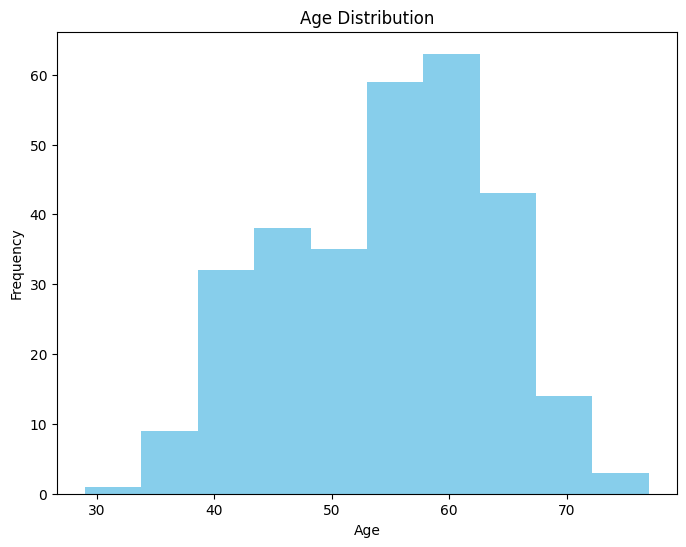

In [9]:
plt.figure(figsize=(8,6))
plt.hist(df["age"], bins=10, color="skyblue")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

## 2. Dot Plots
## Objective: Compare the distribution of a categorical variable, such as chest pain type or presence of fasting blood sugar, with respect to another variable.

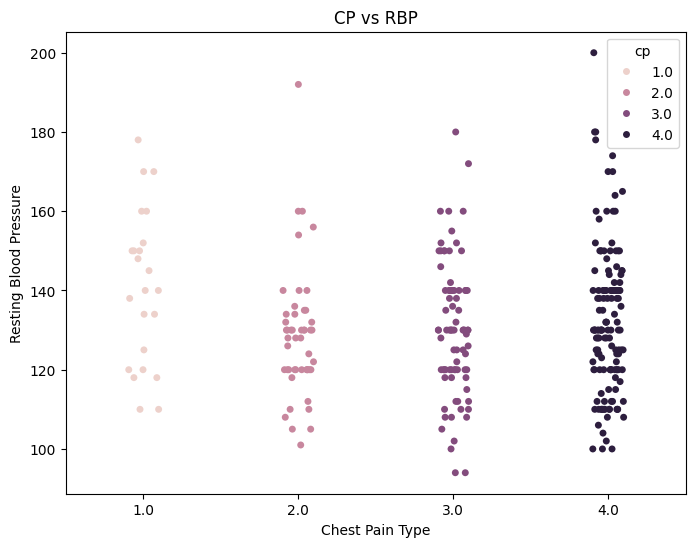

In [14]:
plt.figure(figsize=(8,6))
sns.stripplot(x="cp", y="trestbps", data=df, jitter=True, hue= "cp")
plt.xlabel("Chest Pain Type")
plt.ylabel("Resting Blood Pressure")
plt.title("CP vs RBP")
plt.show()
# plt.legend()

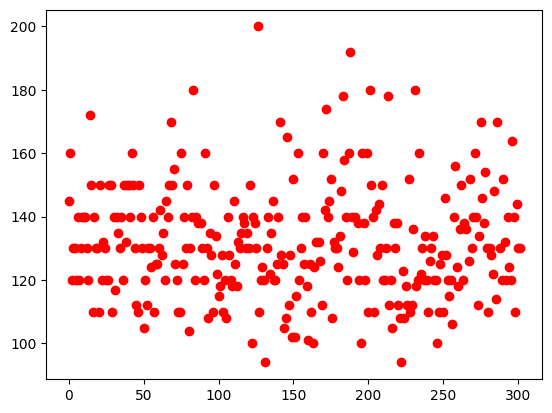

In [22]:
plt.plot(df["trestbps"], "ro")

## 3. Bar Plots
## Objective: Compare the values of a categorical variable, such as the frequency of different types of heart disease, or the distribution of sexes.

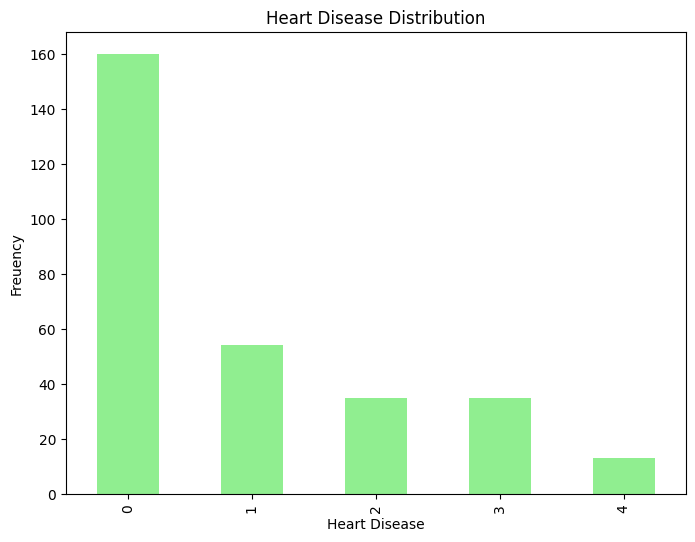

In [16]:
plt.figure(figsize=(8,6))
df["num"].value_counts().plot(kind="bar", color="lightgreen")
plt.xlabel("Heart Disease")
plt.ylabel("Freuency")
plt.title("Heart Disease Distribution")
plt.show()

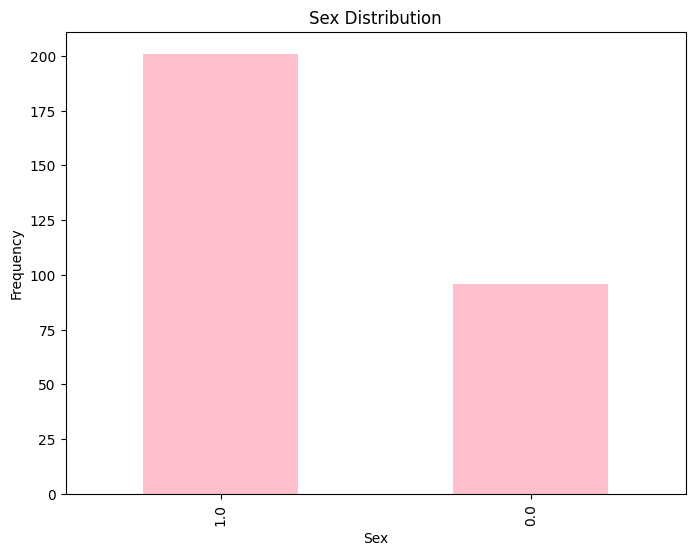

In [17]:
plt.figure(figsize=(8,6))
df["sex"].value_counts().plot(kind="bar", color="pink")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("Sex Distribution")
plt.show()

## 4. Line Charts
## Objective: Visualize trends or patterns in a continuous variable, such as heart rate (thalach) over time.

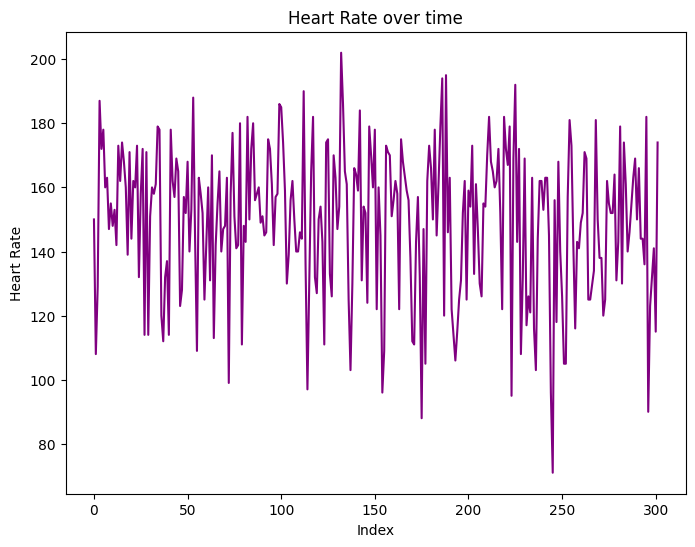

In [18]:
plt.figure(figsize=(8,6))
plt.plot(df["thalach"], color="purple")
plt.xlabel("Index")
plt.ylabel("Heart Rate")
plt.title("Heart Rate over time")
plt.show()

## 5. Multivariate Analysis using Scatter Plots
## Objective: Identify relationships or correlations between two continuous variables, such as age and cholesterol levels, and explore any potential patterns.

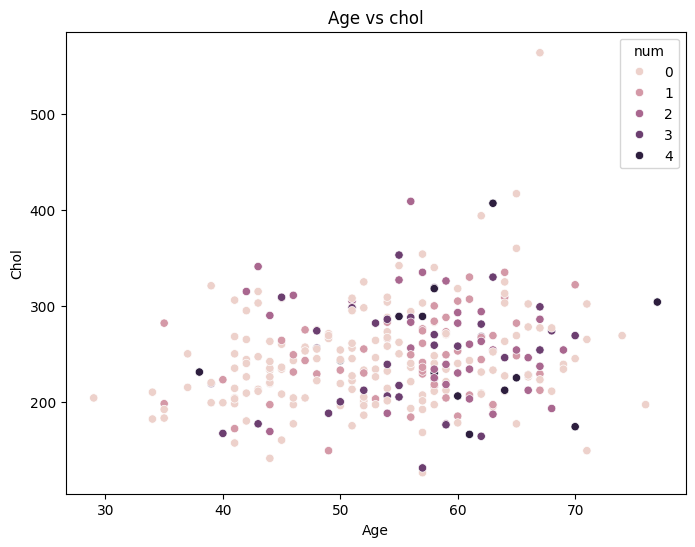

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="age", y="chol", data=df, hue="num")
plt.xlabel("Age")
plt.ylabel("Chol")
plt.title("Age vs chol")
plt.show()

## BOX PLOT

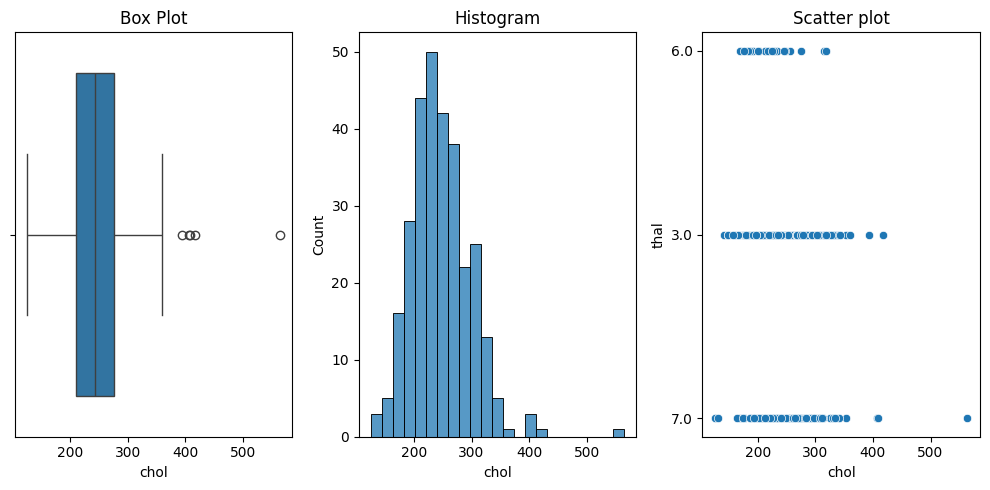

In [21]:
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.boxplot(x="chol", data=df, ax=axes[0])
axes[0].set_title("Box Plot")
sns.histplot(data=df["chol"], ax=axes[1])
axes[1].set_title("Histogram")
sns.scatterplot(x="chol", y="thal", data=df, ax=axes[2])
axes[2].set_title("Scatter plot")

plt.tight_layout()
plt.show()
